In [9]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')

In [11]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
y = titanic.Survived

# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# TASK 4: fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.67264573991


In [2]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [3]:
# drop any row with missing values
titanic.dropna().shape

(183, 11)

In [5]:
titanic[titanic.Age.notnull()].shape

(714, 11)

In [10]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [8]:
titanic.head()
# use knn to impute values, using similarity of points surrounding to update NA vals

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [13]:
print y_test.mean()
print 1-y_test.mean()

0.42600896861
0.57399103139


In [15]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[107,  21],
       [ 52,  43]])

In [17]:
y_pred_prob = logreg.predict_proba(X_test)[:,-1]

(array([  8.,  66.,  27.,  16.,  27.,  32.,   8.,  24.,   9.,   6.]),
 array([ 0.07652196,  0.15504032,  0.23355867,  0.31207703,  0.39059539,
         0.46911375,  0.54763211,  0.62615047,  0.70466882,  0.78318718,
         0.86170554]),
 <a list of 10 Patch objects>)

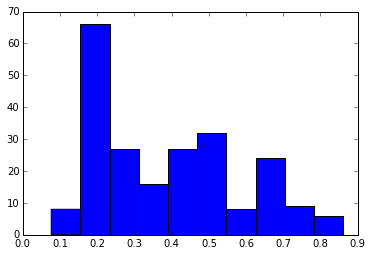

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)

In [24]:
#lower threshold when you want model to be more sensitive (metal detector always predicting positive)
#specific classifier, metal detector doesnt go off unless something real large and metal
#lets adjust our threshold
import numpy as np
y_pred_class = np.where(y_pred_prob >.25,1,0)
# made it more sensitive 
metrics.confusion_matrix(y_test, y_pred_class)

array([[57, 71],
       [27, 68]])

In [26]:
# encode Sex_Female feature
titanic['Sex_Female'] = titanic.Sex.map({'male':0, 'female':1})

In [28]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female']
X = titanic[feature_cols]
y = titanic.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

In [29]:
zip(feature_cols, logreg.coef_[0])

[('Pclass', -1.2209320928750262),
 ('Parch', -0.1173948910960517),
 ('Age', -0.040484295054160194),
 ('Sex_Female', 2.6815252122038973)]

In [ ]:
# increasing pclass decreases survival, etc..
# unit increase in log odds
# increasing sex to female increases your chances of survival. (compared to being a male, a female has a 2.68 increase in the log odds of the response)
# a one unit change means changing from male to female (so this is telling us the effect of the change)

In [30]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
dtype: int64

In [33]:
pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:,1:].head()
#define c as the baseline BY DOING THE FOLLOWING
#take out first column by selecting things by position (do so that you dont have all dummys in classification

,Embarked_Q,Embarked_S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [36]:
embarked_dummys = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:,1:]
titanic = pd.concat([titanic, embarked_dummys], axis=1)

In [38]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female', 'Embarked_S', 'Embarked_Q']
X = titanic[feature_cols]
y = titanic.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('Pclass', -1.1884986694867268),
 ('Parch', -0.09362236486275119),
 ('Age', -0.040727320509893028),
 ('Sex_Female', 2.6425064524101711),
 ('Embarked_S', -0.61019911498632906),
 ('Embarked_Q', -0.18494066391338923)]

In [ ]:
# you are better off embarking at C than you are at S, and S is worse with Q